In [4]:
import torch
from torch.utils.data import random_split
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [5]:
class CFG:
    
                       # No. of epochs for training the model
  # Training settings
  batch_size = 25
  epochs = 10
  lr = 3e-5
  gamma = 0.7
  seed = 42                      # Batch Size for Dataset

#   model_name = 'tf_efficientnet_b4_ns'    # Model name (we are going to import model from timm)
  IMG=224
  img_size = (IMG,IMG)                        # Resize all the images to be 224 by 224
  
  # going to be used for loading dataset
  ds_path = "C:/Users/DLPC/Desktop/Demo_App/images/train/"



# Path to the folder where the datasets are/should be downloaded (e.g. CIFAR10)

# Path to the folder where the pretrained models are saved



# Ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device on which we are:{}".format(device))

device on which we are:cuda


In [6]:
data_dir = "C:/Users/DLPC/Desktop/Demo_App/images"
classes = os.listdir(data_dir+"/train")
classes

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

torch.Size([3, 224, 224]) 0
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
angry


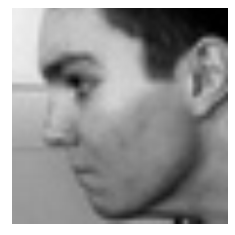

In [7]:
transforms_ = transforms.Compose([transforms.Resize(224),
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
trainset = ImageFolder(data_dir+"/train", transform=transforms_)
img, label = trainset[5]
print(img.shape, label)
print(trainset.classes)
print(trainset.classes[label])
plt.xticks([])
plt.yticks([])
plt.imshow(img.permute(1, 2, 0)/2 + 0.5);  # Un-normalizing the image while showing

In [8]:
# num_classes = 7
# class_count = [0] * num_classes
# for img, label in trainset:
#     class_count[label] += 1

# for num, class_lab in zip(class_count, trainset.classes):
#     print(f"{class_lab}:{num}")
# print(f"Total number of images: {sum(class_count)}")
# print(f"Class with the maximum number of images: {trainset.classes[class_count.index(max(class_count))]}({max(class_count)})")
# print(f"Class with the minimum number of images: {trainset.classes[class_count.index(min(class_count))]}({min(class_count)})")

In [9]:
trainset.classes

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [10]:
# plt.figure(figsize=(7,7))
# plt.title("Bar plot of the number of images in each class")
# sns.barplot(class_count, trainset.classes);

In [11]:
random_seed = 42
torch.manual_seed(random_seed);

val_size = 2800
train_size = len(trainset) - val_size

train_ds, val_ds = random_split(trainset, [train_size, val_size])
len(train_ds), len(val_ds)

(26021, 2800)

In [12]:
from __future__ import print_function
import matplotlib.pyplot as plt
import glob
from itertools import chain
import os
import random
import zipfile
plt.style.use("ggplot")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from linformer import Linformer
from PIL import Image
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from tqdm.notebook import tqdm

# from vit_pytorch.efficient import ViT
import seaborn as sns   #←これを追加
import timm    #←これを追加
# from albumentations.core.transforms_interface import DualTransform

# from efficientnet_pytorch import EfficientNet

# from albumentations.core.transforms_interface import ImageOnlyTransform
# from albumentations.augmentations import functional as F
from PIL import Image, ImageOps, ImageEnhance

In [13]:
from pathlib import Path
labels = []
Base_dir=[]
import os
        

for category in ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']:
    for p in os.listdir(os.path.join(CFG.ds_path, category)):
        f = Path(os.path.join(CFG.ds_path,category, p))
        Base_dir.append(str(f))
        labels.append(str(f.parent.stem))

In [14]:
Base_dir[1][43:]

'\\angry\\1.jpg'

In [15]:
class Dataset():
    def __init__(self, filelist, transform = None):
        self.filelist = filelist
        self.transform = transform

    def __len__(self):
        return int(len(self.filelist))

    def __getitem__(self, index):
        imgpath = self.filelist[index]
        img = Image.open(imgpath).convert(mode="RGB")   

        if "angry" in imgpath[43:]:       #['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']:
            label = 0
        elif "disgust" in imgpath[43:]:
            label = 1
        elif 'fear' in imgpath[43:]:
            label=2
        elif 'happy' in imgpath[43:]:
            label=3
        elif 'neutral' in imgpath[43:]:
            label=4
        elif 'sad' in imgpath[43:]:
            label=5
        elif 'surprise' in imgpath[43:]:
            label=6

        if self.transform is not None:
            img = self.transform(img)

        return (img, label)

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
class_le = LabelEncoder()
labels=class_le.fit_transform(labels)

train_dir, val_dir = train_test_split(Base_dir, test_size=0.2,random_state=123,stratify=labels)
# train_indices,test_val_indices=train_test_split(range(len(Base_dir)), test_size=0.2,random_state=123,stratify=labels)
# test_val_indices=[labels[i] for i in test_val_indices]
# val_dir,test_dir=train_test_split(test_val_dir,test_size=0.5,random_state=123,stratify=test_val_indices)
# val_indices,test_indices=train_test_split(range(len(test_val_dir)),test_size=0.5,random_state=123,stratify=test_val_indices)

In [17]:
train_transformer=  transforms.Compose([
        # transforms.RandomCrop((256, 256), pad_if_needed=True),
        transforms.RandomAffine(10),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        # transforms.RandomGrayscale(p=0.5),
        transforms.RandomRotation(10),
        transforms.Resize((224,224)),
        transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
test_transformer=train_transformer= transforms.Compose([
    transforms.Resize(CFG.img_size),
    transforms.ToTensor(),
    # transforms.Normalize(mean,std)

])

In [18]:
train=Dataset(train_dir,train_transformer)
val=Dataset(val_dir,test_transformer)

In [19]:

def label_counter(data):
    J=[]
    K=[]
    L=[]
    M=[]
    N=[]
    O=[]
    P=[]
    for idx, (data, label) in enumerate(data):
        
        if label==0:
                J.append(label)
        elif label==1:
                K.append(label)
        elif label==2:
                L.append(label)
        elif label==3:
                M.append(label)
        elif label==4:
                N.append(label)
        elif label==5:
                O.append(label)
        elif label==6:
                P.append(label)
        
    print(len(J),len(K),len(L),len(M),len(N),len(O),len(P))
#     print(len(K))
#     print(len(L))

In [20]:
label_counter(train)


3194 349 3282 5731 3986 3950 2564


In [21]:
label_counter(val)

799 87 821 1433 996 988 641


In [16]:
from __future__ import print_function
import matplotlib.pyplot as plt
import glob
from itertools import chain
import os
import random
import zipfile
plt.style.use("ggplot")
import matplotlib.pyplot as plt



import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from linformer import Linformer
from PIL import Image
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from tqdm.notebook import tqdm

# from vit_pytorch.efficient import ViT
import seaborn as sns   #←これを追加
import timm    #←これを追加
# from albumentations.core.transforms_interface import DualTransform

# from efficientnet_pytorch import EfficientNet

# from albumentations.core.transforms_interface import ImageOnlyTransform
# from albumentations.augmentations import functional as F
from PIL import Image, ImageOps, ImageEnhance

In [17]:
from pprint import pprint
model_names = timm.list_models(pretrained=True)
pprint(model_names)

['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'botnet26t_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'convmixer_768_32',
 'convmixer_1024_20_ks9_p14',
 'convmixer_1536_20',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_nano',
 'convnext_small',
 'convnext_small_384_in22ft1k',
 'convnext_small_in22ft1k',
 'convnext_small_in22k',
 'convnext_tiny',
 'convnext_t

In [18]:
model = timm.create_model('vit_small_patch16_224', pretrained=True, num_classes=7)
model.to(device)

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 384, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=384, out_features=1152, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=384, out_features=1536, bias=True)
        (act): GELU()
        (drop1): Dropout(p=0.0, inplace=False)
        (fc2): Linear(in_features=1536, out_features=384, bias=True)
        (drop2): Dropout(p=0.0, inplace=False)
      )
      (ls2): Identity()
     

In [19]:
torch.cuda.empty_cache()
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |   84962 KB |   84962 KB |   84962 KB |       0 B  |\n|       from large pool |   77504 KB |   77504 KB |   77504 KB |       0 B  |\n|       from small pool |    7458 KB |    7458 KB |    7458 KB |       0 B  |\n|---------------------------------------------------------------------------|\n| Active memory         |   84962 KB |   84962 KB |   84962 KB |       0 B  |\n|       from large pool |   77504 KB |   77504 KB |

In [20]:
# loss function
criterion = nn.CrossEntropyLoss()
# optimizer
optimizer = optim.Adam(model.parameters(), lr=CFG.lr)
# scheduler
scheduler = StepLR(optimizer, step_size=1, gamma=CFG.gamma)

In [21]:
# train_loader = DataLoader(dataset = train, batch_size=CFG.batch_size, shuffle=True )
# valid_loader = DataLoader(dataset = val, batch_size=CFG.batch_size, shuffle=True)

In [22]:
import data
# train=Dataset(train_dir,train_transformer)
# val=Dataset(val_dir,test_transformer)
import gc
gc.collect()

429

In [23]:
##ここを追記↓##
train_acc_list = []
val_acc_list = []
train_loss_list = []
val_loss_list = []
##############
train_loader = DataLoader(dataset = data.Dataset(train_dir,train_transformer), batch_size=CFG.batch_size,shuffle=True )
valid_loader = DataLoader(dataset = data.Dataset(val_dir,test_transformer), batch_size=CFG.batch_size,shuffle=False)

for epoch in range(CFG.epochs):
    epoch_loss = 0
    epoch_accuracy = 0

    for data, label in tqdm(train_loader):
        data = data.to(device)
        label = label.to(device)

        output = model(data)
        loss = criterion(output, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        acc = (output.argmax(dim=1) == label).float().mean()
        epoch_accuracy += acc / len(train_loader)
        epoch_loss += loss / len(train_loader)

    with torch.no_grad():
        epoch_val_accuracy = 0
        epoch_val_loss = 0
        for data, label in valid_loader:
            data = data.to(device)
            label = label.to(device)

            val_output = model(data)
            val_loss = criterion(val_output, label)

            acc = (val_output.argmax(dim=1) == label).float().mean()
            epoch_val_accuracy += acc / len(valid_loader)
            epoch_val_loss += val_loss / len(valid_loader)

    print(
        f"Epoch : {epoch+1} - loss : {epoch_loss:.4f} - acc: {epoch_accuracy:.4f} - val_loss : {epoch_val_loss:.4f} - val_acc: {epoch_val_accuracy:.4f}\n"
    )

##ここを追記↓##
    train_acc_list.append(epoch_accuracy)
    val_acc_list.append(epoch_val_accuracy)
    train_loss_list.append(epoch_loss)
    val_loss_list.append(epoch_val_loss)
torch.save(model.state_dict(), f'./weights/model_epoch_10_2.pth')

  0%|          | 0/923 [00:00<?, ?it/s]

Epoch : 1 - loss : 1.0904 - acc: 0.5889 - val_loss : 0.9789 - val_acc: 0.6242



  0%|          | 0/923 [00:00<?, ?it/s]

Epoch : 2 - loss : 0.8158 - acc: 0.6970 - val_loss : 0.8859 - val_acc: 0.6737



  0%|          | 0/923 [00:00<?, ?it/s]

Epoch : 3 - loss : 0.6175 - acc: 0.7735 - val_loss : 0.9268 - val_acc: 0.6757



  0%|          | 0/923 [00:00<?, ?it/s]

Epoch : 4 - loss : 0.4156 - acc: 0.8539 - val_loss : 1.0076 - val_acc: 0.6625



  0%|          | 0/923 [00:00<?, ?it/s]

Epoch : 5 - loss : 0.2398 - acc: 0.9213 - val_loss : 1.1494 - val_acc: 0.6693



  0%|          | 0/923 [00:00<?, ?it/s]

Epoch : 6 - loss : 0.1373 - acc: 0.9571 - val_loss : 1.2538 - val_acc: 0.6760



  0%|          | 0/923 [00:00<?, ?it/s]

Epoch : 7 - loss : 0.0996 - acc: 0.9688 - val_loss : 1.4105 - val_acc: 0.6548



  0%|          | 0/923 [00:00<?, ?it/s]

Epoch : 8 - loss : 0.0949 - acc: 0.9688 - val_loss : 1.4834 - val_acc: 0.6700



  0%|          | 0/923 [00:00<?, ?it/s]

Epoch : 9 - loss : 0.0765 - acc: 0.9762 - val_loss : 1.5062 - val_acc: 0.6872



  0%|          | 0/923 [00:00<?, ?it/s]

Epoch : 10 - loss : 0.0832 - acc: 0.9737 - val_loss : 1.5560 - val_acc: 0.6766



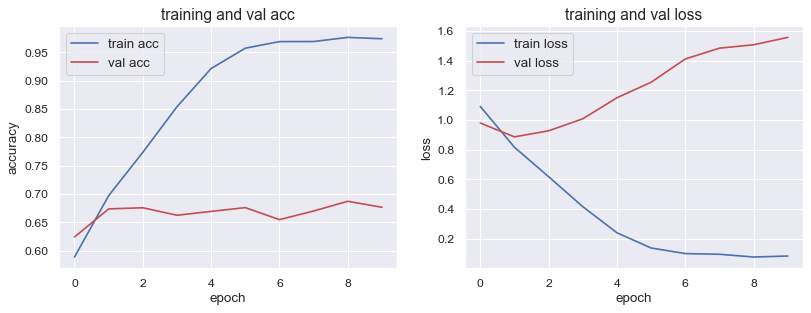

In [25]:
#出力したテンソルのデバイスをCPUへ切り替える
device2 = torch.device('cpu')

train_acc = []
train_loss = []
val_acc = []
val_loss = []
epochs=CFG.epochs
for i in range(epochs):
    train_acc2 = train_acc_list[i].to(device2)
    train_acc3 = train_acc2.clone().numpy()
    train_acc.append(train_acc3)
    
    train_loss2 = train_loss_list[i].to(device2)
    train_loss3 = train_loss2.clone().detach().numpy()
    train_loss.append(train_loss3)
    
    val_acc2 = val_acc_list[i].to(device2)
    val_acc3 = val_acc2.clone().numpy()
    val_acc.append(val_acc3)
    
    val_loss2 = val_loss_list[i].to(device2)
    val_loss3 = val_loss2.clone().numpy()
    val_loss.append(val_loss3)

#取得したデータをグラフ化する
sns.set()
num_epochs = CFG.epochs

fig = plt.subplots(figsize=(12, 4), dpi=80)

ax1 = plt.subplot(1,2,1)
ax1.plot(range(num_epochs), train_acc, c='b', label='train acc')
ax1.plot(range(num_epochs), val_acc, c='r', label='val acc')
ax1.set_xlabel('epoch', fontsize='12')
ax1.set_ylabel('accuracy', fontsize='12')
ax1.set_title('training and val acc', fontsize='14')
ax1.legend(fontsize='12')

ax2 = plt.subplot(1,2,2)
ax2.plot(range(num_epochs), train_loss, c='b', label='train loss')
ax2.plot(range(num_epochs), val_loss, c='r', label='val loss')
ax2.set_xlabel('epoch', fontsize='12')
ax2.set_ylabel('loss', fontsize='12')
ax2.set_title('training and val loss', fontsize='14')
ax2.legend(fontsize='12')
plt.show()